## Least Squares Solutions

In this section we address the problem of inconsistent systems, and the common resolution known as least squares solutions.

In the case that $AX=B$ is inconsistent, there is no vector $X$ such that the two vectors $AX$ and $B$ are the same.  A natural idea then is to choose a vector $X$ such that $AX$ and $B$ are as close as possible.  To do this we define the error vector $E=AX-B$, and choose the $X$ that minimizes $|E|$.  This choice of $X$ is known as the **least squares solution** to the system $AX=B$, and we will assign it the symbol $\hat{X}$.  The direct approach to this formulation of the problem requires the use of calculus to minimize $|E|$, but we will take a different approach that only requires inner products and projections.  We will first give the solution to the least squares problem with only a visual explanation.  After some examples, we will provide a more rigorous explanation.  

Recall that if the system $AX=B$ is inconsistent, the vector $B$ is not in $\mathcal{C}(A)$, the column space of $A$.  **The error vector $E=AX-B$ has minimum magnitude exactly when it is orthogonal to $\mathcal{C}(A)$**.  We can easily visualize this if in the case that $\mathcal{C}(A)$ as a one dimensional subspace of $\mathbb{R}^2$.

### Example 1

Let's consider a simple example of an inconsistent system $AX=B$, where $A$ is a $2\times 2$ matrix.

$$
\begin{equation}
\left[\begin{array}{rr} 3 & 1 \\ 9 & 3 \end{array}\right]X = \left[\begin{array}{r} 2 \\ 4 \end{array}\right]    
\end{equation}
$$

In this example, the second column of $A$ is a multiple of the first, so the $\mathcal{C}(A)$ is a one-dimensional space that contains only multiples of these vectors.  Since $B$ is not a multiple of either column, $B$ is not in $\mathcal{C}(A)$.

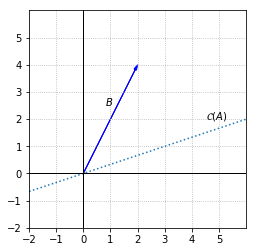

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-6,6,100)

fig, ax = plt.subplots()

options = {"head_width":0.1, "head_length":0.2, "length_includes_head":True}

ax.arrow(0,0,2,4,fc='b',ec='b',**options)
ax.plot(x,x/3,ls=':')


ax.set_xlim(-2,6)
ax.set_ylim(-2,6)
ax.set_aspect('equal')
ax.set_xticks(np.arange(-2,6,step = 1))
ax.set_yticks(np.arange(-2,6,step = 1))

ax.text(0.8,2.5,'$B$')
ax.text(4.5,2,'$\mathcal{C}(A)$')

ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)

ax.grid(True,ls=':')

Let's look at the relationship between $AX$, $B$, and $E$ for an arbitrary $X$.

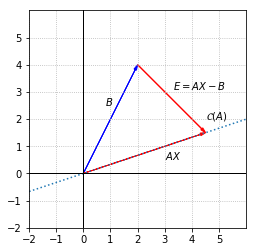

In [2]:
fig, ax = plt.subplots()

options = {"head_width":0.1, "head_length":0.2, "length_includes_head":True}

ax.arrow(0,0,2,4,fc='b',ec='b',**options)
ax.arrow(0,0,4.5,1.5,fc='r',ec='r',**options)
ax.arrow(2,4,2.5,-2.5,fc='r',ec='r',**options)
ax.plot(x,x/3,ls=':')

ax.set_xlim(-2,6)
ax.set_ylim(-2,6)
ax.set_aspect('equal')
ax.set_xticks(np.arange(-2,6,step = 1))
ax.set_yticks(np.arange(-2,6,step = 1))

ax.text(0.8,2.5,'$B$')
ax.text(4.5,2,'$\mathcal{C}(A)$')
ax.text(3,0.5,'$AX$')
ax.text(3.3,3.1,'$E=AX-B$')

ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)

ax.grid(True,ls=':')

We can see that $|E|$ is a measure between $B$ and a vector in $\mathcal{C}(A)$, and that $|E|$ will be minimized if we choose $X$ so that $E$ is orthogonal to $\mathcal{C}(A)$.  This is the least squares solution we refer to as $\hat{X}$.  The closest vector in $\mathcal{C}(A)$ to $B$ is the *orthogonal projection* of $B$ onto $\mathcal{C}(A)$.  We will use the notation $\hat{B}$ for this projection so that we now have $A\hat{X}=\hat{B}$. 

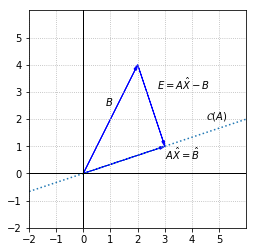

In [3]:
fig, ax = plt.subplots()

options = {"head_width":0.1, "head_length":0.2, "length_includes_head":True}

ax.arrow(0,0,2,4,fc='b',ec='b',**options)
ax.arrow(0,0,3,1,fc='b',ec='b',**options)
ax.arrow(2,4,1,-3,fc='b',ec='b',**options)
ax.plot(x,x/3,ls=':')

ax.set_xlim(-2,6)
ax.set_ylim(-2,6)
ax.set_aspect('equal')
ax.set_xticks(np.arange(-2,6,step = 1))
ax.set_yticks(np.arange(-2,6,step = 1))

ax.text(0.8,2.5,'$B$')
ax.text(4.5,2,'$\mathcal{C}(A)$')
ax.text(3,0.5,'$A\hat{X}=\hat{B}$')
ax.text(2.7,3.1,'$E=A\hat{X}-B$')

ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)

ax.grid(True,ls=':')

Based on our discussion in the previous section, we know that if $E$ is orthogonal to $\mathcal{C}(A)$, it must be the $E$ is in $\mathcal{N}(A^T)$, the null space of $A^T$.  

Possible routes and associated ideas:
- Given orthogonal complements of $\mathbb{R}^n$ and a vector $V$, there is a unique decomposition of $V$. (Decomposition Theorem?)  This is really a theoretical statement that could come after LSS.  Perhaps we could add a section after LSS addressing projections in the abstract.

- If $AX=B$ is inconsistent, we understand that $B$ is not in $\mathcal{C}(A)$.  We could propose to solve $AX=\hat{B}$, where $\hat{B}$ is the projection of $B$ onto $\mathcal{C}(A)$, but this requires that we explain that $\hat{B}$ is the closest vector to $B$ that is in $\mathcal{C}(A)$.  (Best Approximation Theorem?)  This approach does not provide any motivation, and further requires that we discuss projection onto subspaces, which should not be the emphasis of the section.

- We could propose that if there is no $X$ for which $AX=B$, we could seek the vector $\hat{X}$ that minimizes the error $E = A\hat{X}-B$.  This could be solved with Calculus, or we could reason that $E$ is minimum when $\hat{X}$ is the solution to $AX=\hat{B}$.  

- It turns out that the error is at its minimum exactly when it is orthogonal to $\mathcal{C}(A)$ (Again, we need the Best Approximation result.)  We could thus require that $E$ is orthogonal to each column of $A$, or equivalently, that $E$ lie in $\mathcal{N}(A)$.  This leads directly to the normal equations $A^TA=A^TB$. 